**BASIC LIBRARY**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Basic signal (linear)

In [ ]:
fs = 10;
st = 0;
ed = 1;
x = np.array(range(st, ed * fs + 1, 1)) * 1/fs
y = np.arange(st, ed + 1 / fs, 1 / fs)
z = np.linspace(st, ed, (ed-st)* fs+1)

print(x, y, z)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


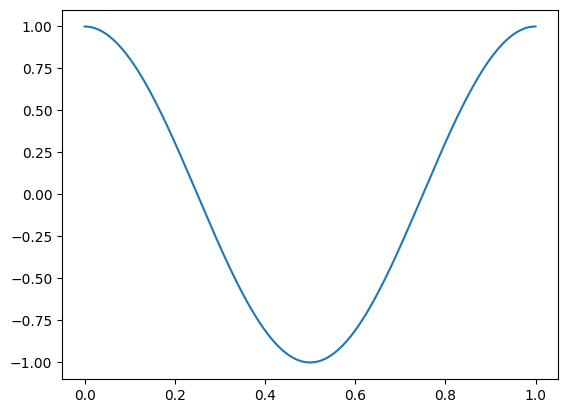

In [ ]:
fs = 1000; st = 0; ed = 1;
nTs = np.arange(st, ed+1/fs, 1/fs)
plt.plot(nTs, np.cos(2*np.pi*nTs));

<StemContainer object of 3 artists>

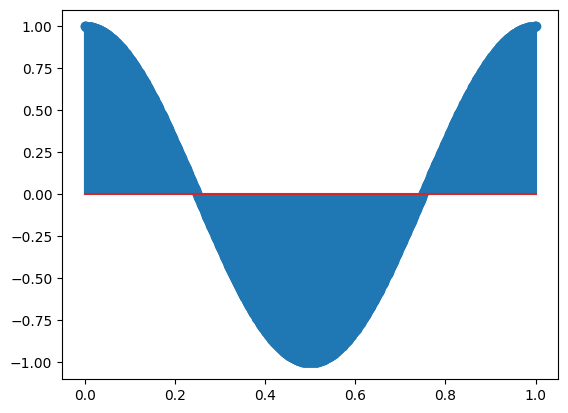

In [ ]:
plt.stem(nTs, np.cos(2*np.pi*nTs)) #(x축 , y축)

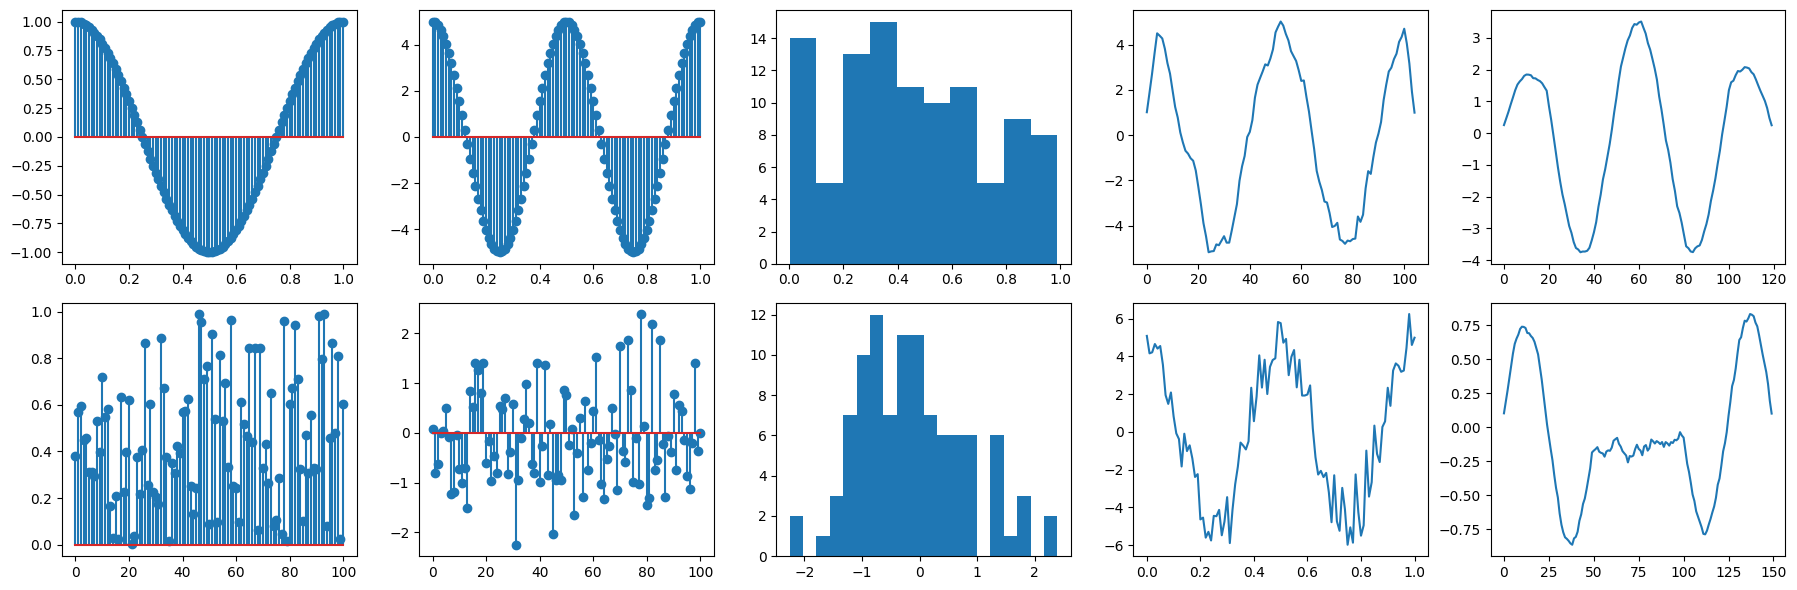

In [ ]:
x = lambda A, f, phi, t : A*np.cos(2*np.pi*f*t+phi)
fs = 100; st = 0; ed = 1;


nTs = np.arange(st, ed+1/fs, 1/fs);
fig, ax = plt.subplots(2,5, figsize = (18,6))

ax[0,0].stem(nTs, np.cos(2*np.pi*nTs))

x1 = x(5, 2, 0, nTs); ax[0, 1].stem(nTs, x1)

np.random.seed(64); N = len(nTs)
n1 = np.random. rand(N); n2 = np.random.randn(N);

ax[1,0].stem(n1); ax[1,1].stem(n2)
ax[0,2].hist(n1, bins =10); ax[1,2].hist(n2, bins = 20);


xn = x1 + n2; ax[1,3].plot(nTs, xn);
M = 5; yn = np.convolve(xn, 1/M*np.ones(M)); ax[0,3].plot(yn);
M = 20; yn = np.convolve(xn, 1/M*np.ones(M)); ax[0,4].plot(yn);
M = 50; yn = np.convolve(xn, 1/M*np.ones(M)); ax[1,4].plot(yn);


fig.tight_layout();

**Noise modeling**

0.49200522249496575 2.961156369905336 0.2918708593880169 1.9619809946338003


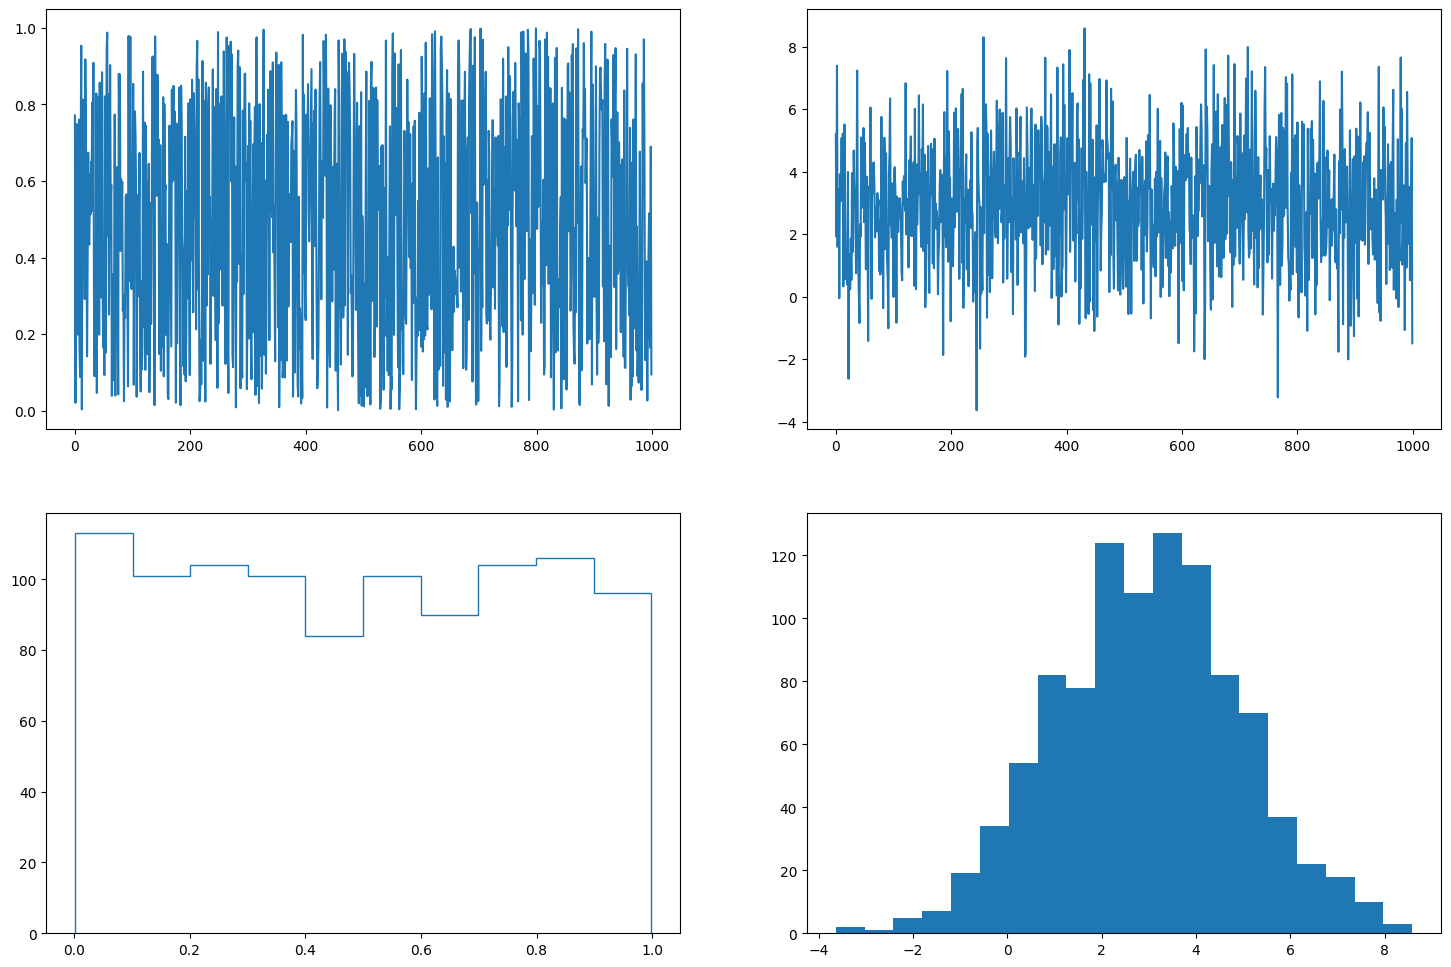

In [ ]:
np.random.seed(10); N = 1000;
x = np.random.rand(N);  #균일분포 0~1
y = 2 * np.random.randn(N) + 3 #가우시안 분포 u(평균) = 3, 표준편차 2
fig, ax = plt.subplots(2,2, figsize=(18,12), dpi=100);
ax[0,0].plot(x); ax[0,1].plot(y)
ax[1,0].hist(x, bins=10, histtype='step'); #히스토그램 bins 10개 잘라 그릴거다 , 계단
ax[1,1].hist(y, bins=20);
print(np.mean(x), np.mean(y), np.std(x), np.std(y))


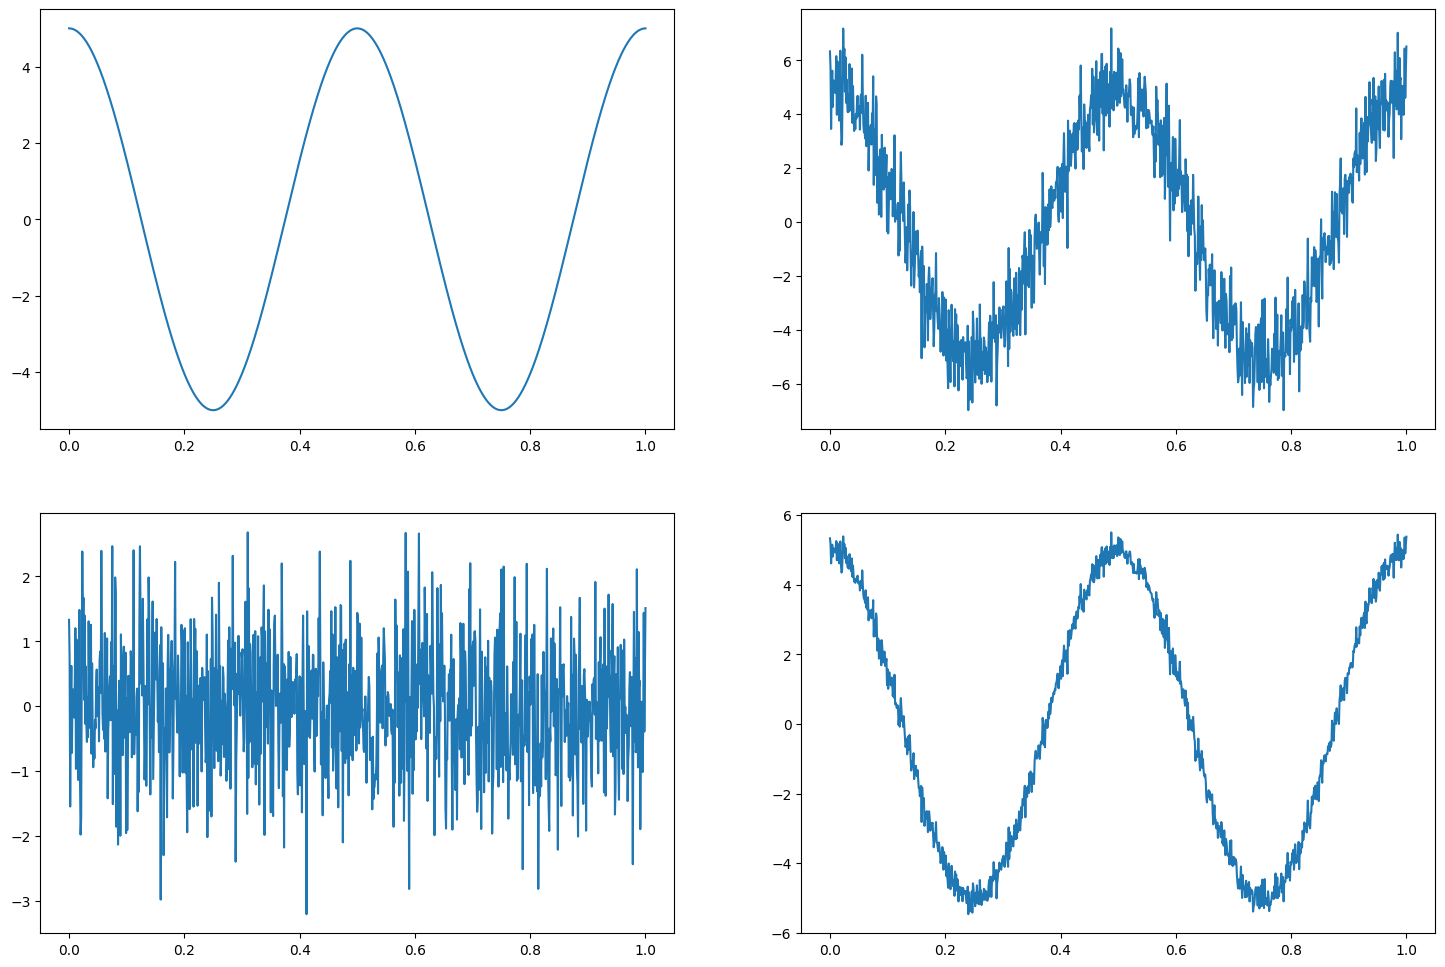

In [ ]:
x = lambda A, f, phi, t: A*np.cos(2*np.pi*f*t + phi) # Acos(2 pi f t + 위상)
fs = 1000; st = 0; ed = 1;
nTs = np.arange(st, ed+1/fs, 1/fs)
x1 = x(5, 2, 0*np.pi/4, nTs);
np.random.seed(10);
N = len(nTs); n1 = np.random.randn(N);
fig, ax = plt.subplots(2,2, figsize=(18,12), dpi=100);
ax[0,0].plot(nTs, x1); ax[0,1].plot(nTs, x1+n1); #그냥 곱
ax[1,0].plot(nTs, n1); ax[1,1].plot(nTs, x1+0.25*n1); #진폭 조절해서 플롯

**이산 테스트 신호**

In [ ]:
n = np.arange(-5, 15+1)
# 임펄스 신호
imp = lambda n: (n==0)*(n==np.round(n)).astype(float)
# 계단 신호
u = lambda n: (n>=0)*(n==np.round(n)).astype(float)
# 지수 신호
x1 = (0.7)**n * (n>=0)
# 정현 신호
x2 = np.cos(2*np.pi*n/12)

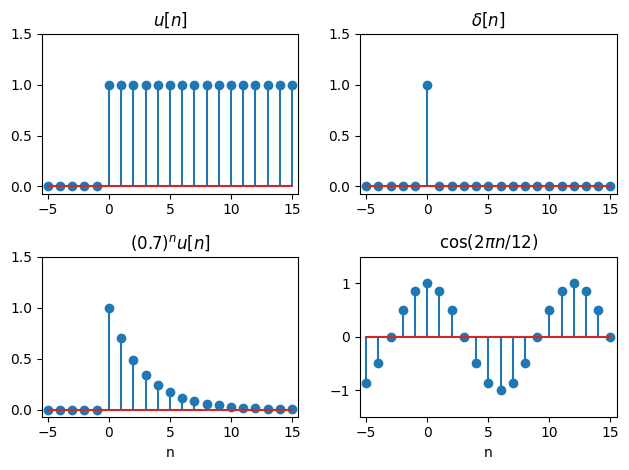

In [ ]:
pp = lambda m, n, tt : axes[m,n].set(xlim=[-5.5,15.5],
ylim=[-0.07,1.5], title=tt)
fig, axes = plt.subplots(2,2)
axes[0,0].stem(n, u(n)); pp(0, 0, '$u[n]$')
axes[0,1].stem(n, imp(n)); pp(0, 1, '$\delta[n]$')
axes[1,0].stem(n, x1); pp(1, 0, '$(0.7)^n u[n]$')
axes[1,0].set_xlabel('n')
axes[1,1].stem(n, x2); axes[1,1].set_xlabel('n')
axes[1,1].set(xlim=[-5.5,15.5], ylim=[-1.5,1.5],
title=r'$\cos(2\pi n/12)$')
fig.tight_layout()

<StemContainer object of 3 artists>

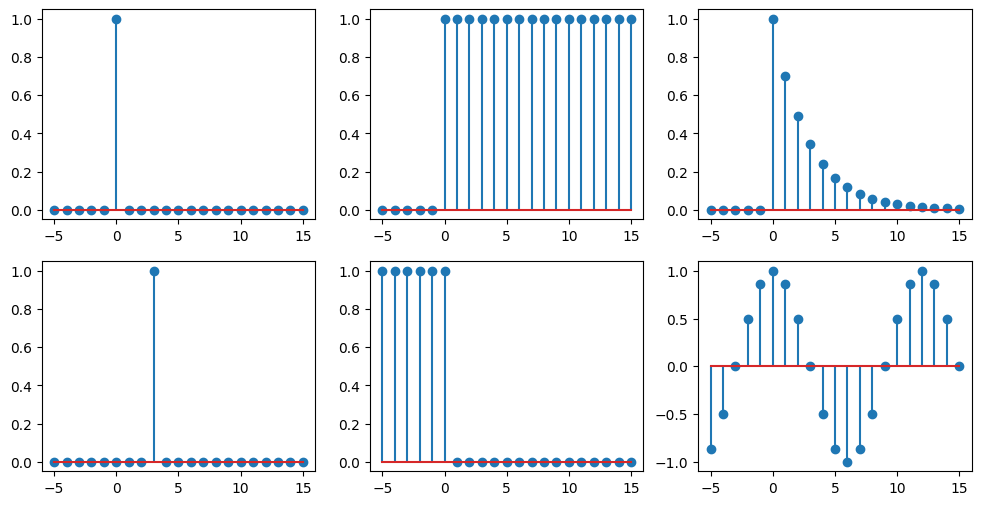

In [ ]:
n = np.arange(-5, 16);
imp = lambda n : (n == 0)
u = lambda n : (n >= 0)
x1 = (0.7)**n * u(n)
x2 = np.cos(2*np.pi*n/12);
fig, ax = plt.subplots(2,3, figsize=(12,6))
ax[0,0].stem(n, imp(n)); ax[0,1].stem(n, u(n));
ax[0,2].stem(n,x1); ax[1,2].stem(n, x2)
ax[1,0].stem(n, imp(n-3)); ax[1,1].stem(n, u(-n))


**Sampling & Aliasing**

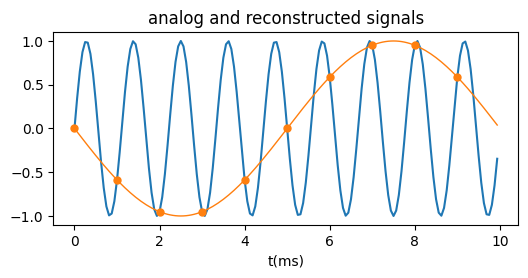

In [ ]:
from IPython.display import Audio, display

fs = 1000; T = 0.01; fa = 16000
t = np.arange(0, T, 1/fa); n = np.arange(0, T, 1/fs)
x = lambda t, f0: np.sin(2*np.pi*f0*t)
f0 = 900; frecons = min(f0, f0-fs)
fig, ax = plt.subplots(figsize=(6,2.5))
ax.plot(t*1000, x(t,f0), color='C0')
ax.plot(n*1000, x(n,f0), 'C1o', ms=5)
ax.plot(t*1000, x(t,frecons), color='C1', lw=1)
ax.set(xlabel='t(ms)', title='analog and reconstructed signals')
tplay = np.arange(0, 1, 1/fa)
display(Audio(data=x(tplay,f0), rate=fa))
display(Audio(data=x(tplay,frecons), rate=fa))